In [1]:
install.packages("kernlab")
library(kernlab)
library(kknn)


  There is a binary version available but the source version is later:
        binary source needs_compilation
kernlab 0.9-29 0.9-32              TRUE

  Binaries will be installed
package 'kernlab' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'kernlab'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Tien\anaconda3\envs\new evn\Lib\R\library\00LOCK\kernlab\libs\x64\kernlab.dll to C:\Users\Tien\anaconda3\envs\new evn\Lib\R\library\kernlab\libs\x64\kernlab.dll: Permission denied"Warning message:
"restored 'kernlab'"


The downloaded binary packages are in
	C:\Users\Tien\AppData\Local\Temp\RtmpQ1NNvh\downloaded_packages


Warning message:
"package 'kknn' was built under R version 3.6.3"

In [2]:
data <- read.table("./data 3.1/credit_card_data.txt") 
head(data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1,30.83,0.000,1.25,1,0,1,1,202,0,1
0,58.67,4.460,3.04,1,0,6,1,43,560,1
0,24.50,0.500,1.50,1,1,0,1,280,824,1
1,27.83,1.540,3.75,1,0,5,0,100,3,1
1,20.17,5.625,1.71,1,1,0,1,120,0,1
1,32.08,4.000,2.50,1,1,0,0,360,0,1


In [3]:
set.seed(1)

# Question 3.1 

In [4]:
check_accuracy = function(X){
  predict <- rep(0,(nrow(data)))
  for (i in 1:nrow(data)){
    model=kknn(V11~V1+V2+V3+V4+V5+V6+V7+V8+V9+V10,data[-i,],data[i,],k=X, scale = TRUE) 
    predict[i] <- as.integer(fitted(model)+0.5) 
  }
  accuracy = sum(predict == data[,11]) / nrow(data)
  return(accuracy)
}

In [5]:
accuracy <- rep(0,20) 
for (X in 1:20){
  accuracy[X] = check_accuracy(X) 
}

In [6]:
accuracy

[1] 0.8149847 0.8149847 0.8149847 0.8149847 0.8516820 0.8455657 0.8470948
 [8] 0.8486239 0.8470948 0.8501529 0.8516820 0.8532110 0.8516820 0.8516820
[15] 0.8532110 0.8516820 0.8516820 0.8516820 0.8501529 0.8501529

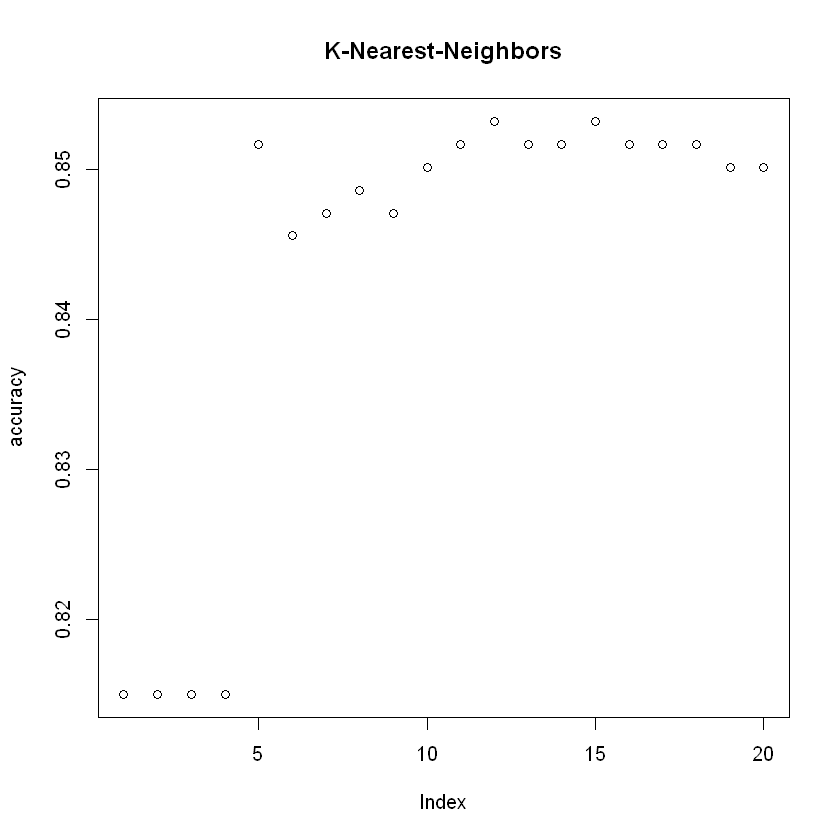

In [7]:
plot(accuracy)
title("K-Nearest-Neighbors")

In [8]:
k_accuracy = max(accuracy)
k_accuracy

[1] 0.853211

In [9]:
k_max = which.max(accuracy)
k_max

[1] 12

### k = 12 are nearest max accuracy because they have the biggest values (~0.853)

In [10]:
# Splitting the data for training
d.rows = nrow(data)

In [11]:
# Creating sample data
d.sample = sample(1:d.rows, size=round(d.rows/3), replace = FALSE)

In [12]:
# Creating training data and excluding the sample
d.train = data[-d.sample,]

In [13]:
# Creating the test data with sample data
d.test = data[d.sample,]

In [14]:
# Cross Validation
cross_validation = train.kknn(V11~V1+V2+V3+V4+V5+V6+V7+V8+V9+V10, data = d.train, kmax =100, kernal = c("optimal","rectangular","inv","gaussian","triangular"),scale =TRUE)


### Cross Validation

In [15]:
cross_validation


Call:
train.kknn(formula = V11 ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 +     V8 + V9 + V10, data = d.train, kmax = 100, scale = TRUE,     kernal = c("optimal", "rectangular", "inv", "gaussian", "triangular"))

Type of response variable: continuous
minimal mean absolute error: 0.2134519
Minimal mean squared error: 0.1127144
Best kernel: optimal
Best k: 41

### We found that the best k is 41

### Testing the result

In [16]:
prediction <- predict(cross_validation,d.test)
prediction_bin <- round(prediction)
prediction_accuracy <- table(prediction_bin,d.test$V11)

In [17]:
prediction_accuracy

              
prediction_bin   0   1
             0 104  16
             1  16  82

In [18]:
sum(prediction_bin==d.test$V11)/length(d.test$V11)

[1] 0.853211

### The result show that the best k = 41 has prediction accuracy is ~ 0.853

# Question 4.1

#### When surfing the internet, I have received so many ads selling similar products, clothes that fit my style, or stuff that I need. I realize the advertising is based on some clustering model such as my behavior and characteristics so they can offer me the right product ads. 

### Predictors:
#### - Purchase history: They can analyze the types of products that I have purchased to know about my style and favorites, and the frequency of my purchases. Therefore, they can define the clusters of customers who have similar buying behavior.
#### - Demographic: Age, gender, and race can be different customer segments.
#### - Online behavior: the business can tailor the ads based on analyzing website interactions, click-through rates, time spent, and type of websites.

# Question 4.2

In [19]:
iris <- read.table("./data 4.2/iris.txt", header = TRUE)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'ggplot2'

The following object is masked from 'package:kernlab':

    alpha



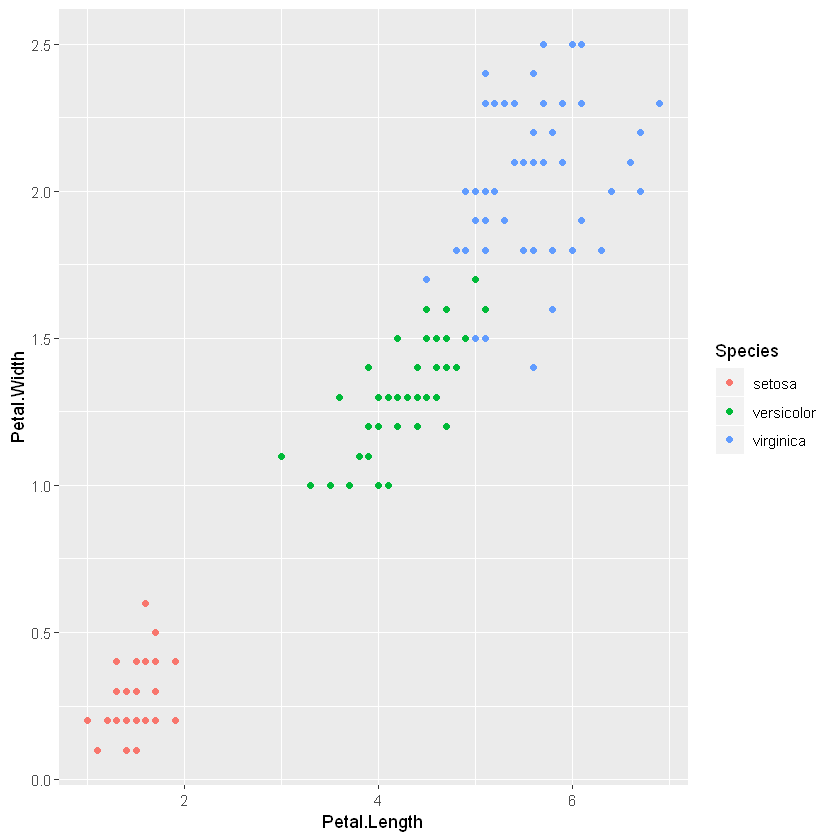

In [20]:
library(ggplot2)
ggplot(iris,aes(Petal.Length,Petal.Width,color =Species))+geom_point()

In [21]:
set.seed(1)

#### Pulling Petal length and Petal Width, 3 species, and try 20 different random

In [22]:
iris_cluster <- kmeans (iris[, 3: 4], 3, nstart = 20)
iris_cluster

K-means clustering with 3 clusters of sizes 50, 48, 52

Cluster means:
  Petal.Length Petal.Width
1     1.462000    0.246000
2     5.595833    2.037500
3     4.269231    1.342308

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   1   1   1   1   1   1   1   1   3   3   3   3   3   3   3   3   3   3 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   2   3   3 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  3   3   3   2   3   3   3   3   3   3   3   3   3   3   3   3   3   3 

### Best clustering predicts flower type: 

In [23]:
table(iris_cluster$cluster, iris$Species)

   
    setosa versicolor virginica
  1     50          0         0
  2      0          2        46
  3      0         48         4

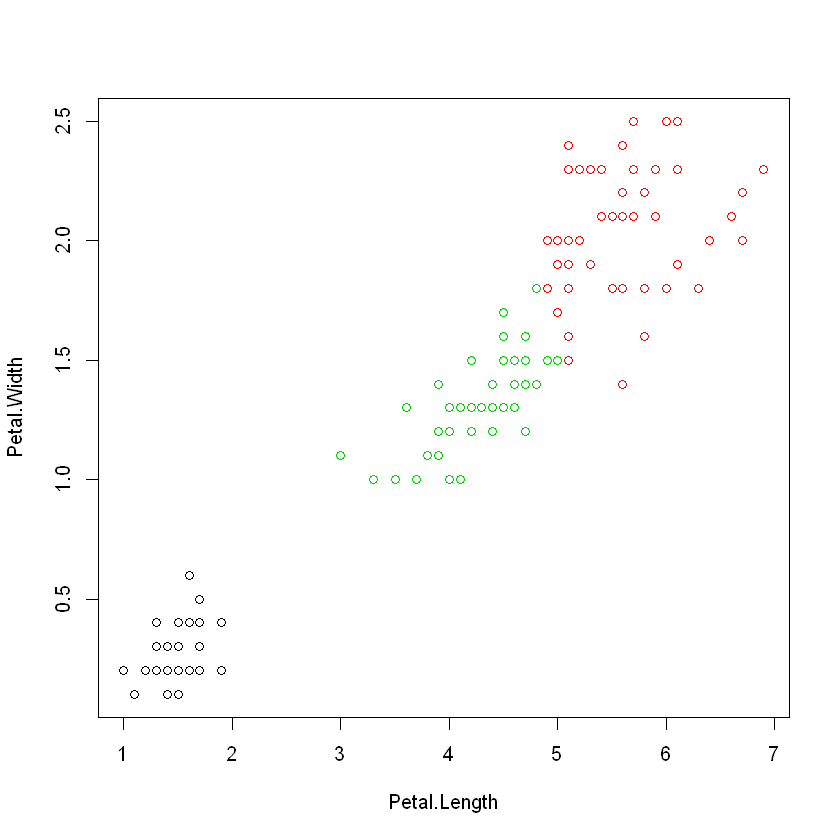

In [24]:
plot(iris[,3:4],col =iris_cluster$cluster)